In [1580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Intro**

 **Reading of the csv file and converting to a Data Frame**


In [1581]:
df = pd.read_csv('wine4.csv')
df.head()

,sample,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
0,0,7.0,0.27,2.16,20.7,0.045,167.0,170.0,very high,3.00,0.45,8.8,6,white
1,1,6.3,0.30,2.04,1.6,0.049,136.0,132.0,medium,3.30,0.49,9.5,6,white
2,2,8.1,0.28,2.40,6.9,0.050,148.0,97.0,high,3.26,0.44,10.1,6,white
3,3,7.2,0.23,1.92,8.5,0.058,165.0,186.0,high,3.19,0.40,9.9,6,white
4,4,7.2,0.23,1.92,8.5,0.058,169.0,186.0,high,3.19,0.40,9.9,6,white


In [1582]:
df.drop('sample',inplace=True,axis = 1)

**Checking the number of instances and the total number of features present**

In [1583]:
print('The total number of instances present in the dataset is', len(df))
print('The total number of features present in the dataset is', len(df.columns))

The total number of instances present in the dataset is 6497
The total number of features present in the dataset is 13


In [1584]:
df_random = df[:]

**Data Preprocessing**

In [1585]:
#Renaming the columns for better readability

df.rename(columns = {'fixed acidity':'FA','volatile acidity':'VA','citric acid':'CA','residual sugar':'RS','free sulfur dioxide':'FSD','total sulfur dioxide':'TSD'},inplace = True)
df.head()

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality,kind
0,7.0,0.27,2.16,20.7,0.045,167.0,170.0,very high,3.00,0.45,8.8,6,white
1,6.3,0.30,2.04,1.6,0.049,136.0,132.0,medium,3.30,0.49,9.5,6,white
2,8.1,0.28,2.40,6.9,0.050,148.0,97.0,high,3.26,0.44,10.1,6,white
3,7.2,0.23,1.92,8.5,0.058,165.0,186.0,high,3.19,0.40,9.9,6,white
4,7.2,0.23,1.92,8.5,0.058,169.0,186.0,high,3.19,0.40,9.9,6,white


**Initial Data Analysis**

In [1586]:
#checking for the null values

df.isna().sum()


FA           194
VA             0
CA           457
RS            72
chlorides      0
FSD          372
TSD          727
density      192
pH             0
sulphates      0
alcohol       81
quality        0
kind           0
dtype: int64

In [1587]:
#checking the basic information of the data set. we are checking out the data type of each columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FA         6303 non-null   float64
 1   VA         6497 non-null   float64
 2   CA         6040 non-null   float64
 3   RS         6425 non-null   float64
 4   chlorides  6497 non-null   float64
 5   FSD        6125 non-null   float64
 6   TSD        5770 non-null   float64
 7   density    6305 non-null   object 
 8   pH         6497 non-null   float64
 9   sulphates  6497 non-null   float64
 10  alcohol    6416 non-null   float64
 11  quality    6497 non-null   int64  
 12  kind       6497 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 609.2+ KB


We can see that every attribute is numerical in nature and every attribute has the float type except for the quality feature which is of integer type and density, kind ar categorical attributes


In [1588]:
#checking the summary of all the columns. This will give us a idea of the mean and median, IQR i.e Descriptive statistics
df.describe()


,FA,VA,CA,RS,chlorides,FSD,TSD,pH,sulphates,alcohol,quality
count,6303.000000,6497.00000,6040.000000,6425.000000,6497.000000,6125.000000,5770.000000,6497.000000,6497.000000,6416.000000,6497.000000
mean,7.183104,0.37178,1.863810,5.443837,0.056034,146.834122,115.802080,3.218501,0.531268,10.487661,5.818378
std,1.378804,0.50821,0.889848,4.763496,0.035034,25.724505,56.473495,0.160787,0.148806,1.191010,0.873255
min,0.110000,0.08000,0.000000,0.600000,0.009000,59.000000,6.000000,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.23000,1.330000,1.800000,0.038000,129.000000,77.000000,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.29000,1.860000,3.000000,0.047000,147.000000,118.000000,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.41000,2.380000,8.100000,0.065000,164.000000,155.000000,3.320000,0.600000,11.300000,6.000000
max,15.900000,13.00000,9.960000,65.800000,0.611000,347.000000,440.000000,4.010000,2.000000,14.900000,9.000000


In [1589]:
df['quality'].value_counts().sort_values()

9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: quality, dtype: int64

In [1590]:
df[df['quality'] <= 3]

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality,kind
251,8.5,0.260,0.63,16.20,0.074,103.0,NaN,very high,3.02,0.50,9.80,3,white
253,5.8,0.240,1.32,3.50,0.029,63.0,109.0,low,3.53,0.43,11.70,3,white
294,9.1,0.590,1.14,1.60,0.066,94.0,182.0,high,3.23,0.38,8.50,3,white
445,7.1,0.320,0.96,11.00,0.038,72.0,66.0,medium,3.24,0.40,11.50,3,white
740,6.9,0.390,1.20,4.60,0.022,NaN,19.0,low,3.31,0.37,12.60,3,white
873,10.3,0.170,1.41,1.40,0.037,65.0,33.0,medium,2.89,0.28,9.60,3,white
1034,7.9,0.640,1.38,10.60,0.244,95.0,227.0,very high,2.87,0.74,9.10,3,white
1229,8.3,0.330,1.26,1.15,0.033,80.0,96.0,low,3.20,0.32,12.40,3,white
1417,8.6,0.550,1.05,15.55,0.057,99.5,366.5,very high,3.04,0.63,11.00,3,white
1484,7.5,0.320,0.72,4.60,0.053,62.0,134.0,high,3.14,0.50,9.10,3,white


In [1591]:
#replace the null values with its mean

df.fillna(df.mean(),inplace=True)

In [1592]:
df.isna().sum()

FA             0
VA             0
CA             0
RS             0
chlorides      0
FSD            0
TSD            0
density      192
pH             0
sulphates      0
alcohol        0
quality        0
kind           0
dtype: int64

There are still 192 missing categorical values present for the density feature. now - remove them.

In [1593]:
df.dropna(inplace=True)

**Exploratory Data Analysis**

In [1594]:
df['kind'].dtype == 'object'

True

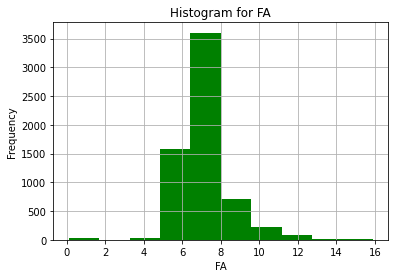

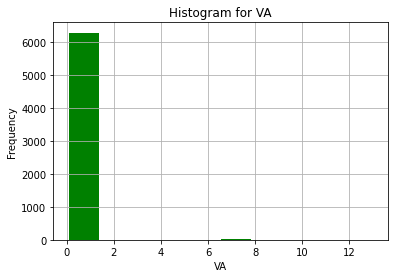

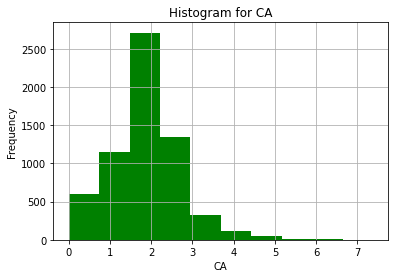

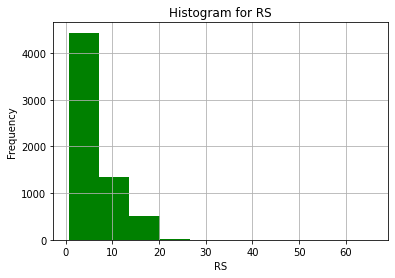

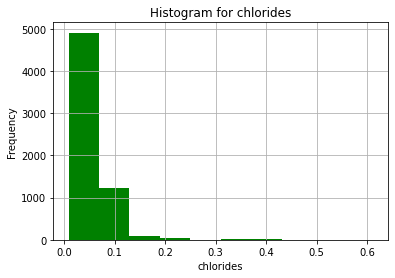

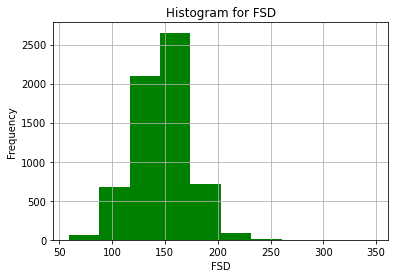

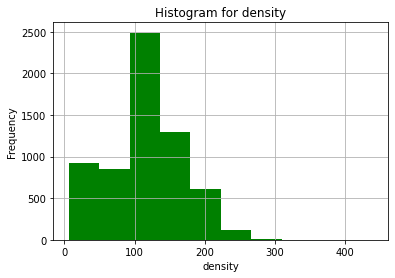

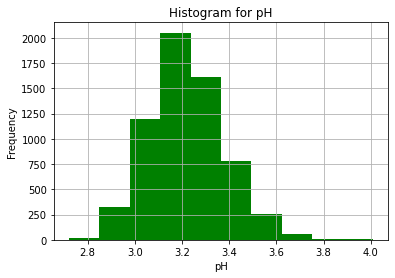

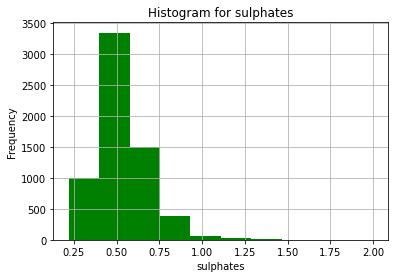

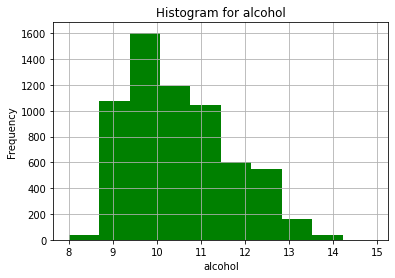

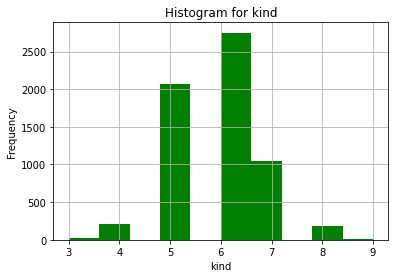

In [1595]:
#checking the distibution of each of the column

for i in df.columns:
    if df[i].dtypes != 'object':
        df.hist(column = i,color = ['green'])
  
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("Histogram for " + str(i))

We can see that many of the features doesn't have a normal distribution and has skewed distribution.  
There might be a presnce of outliers. So now remove such outliers. Outliers affects the performance 

In [1596]:
list(df.columns)

['FA',
 'VA',
 'CA',
 'RS',
 'chlorides',
 'FSD',
 'TSD',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'kind']

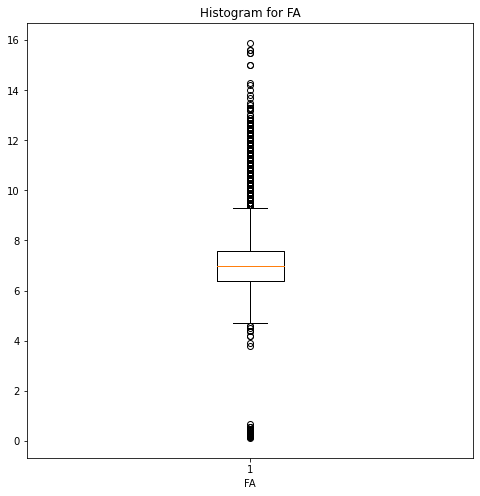

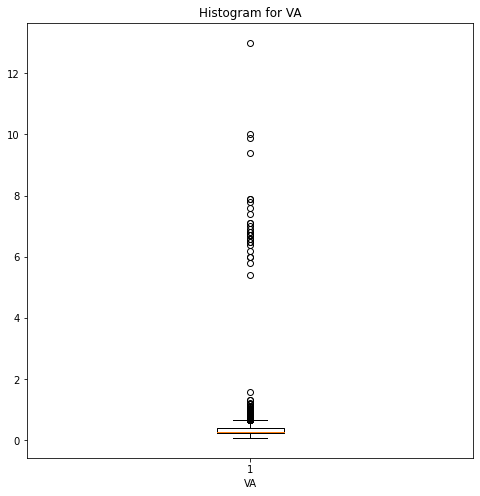

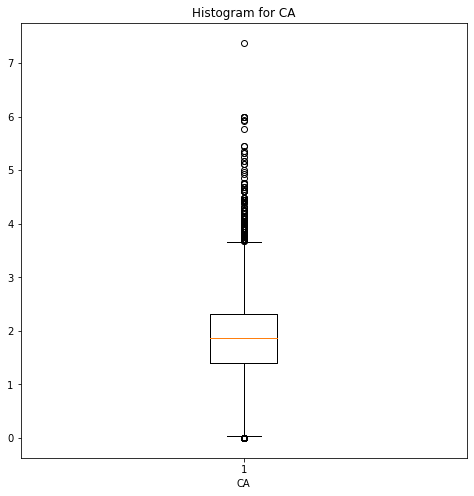

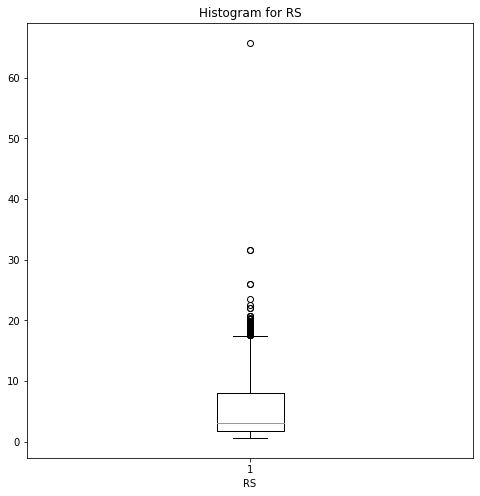

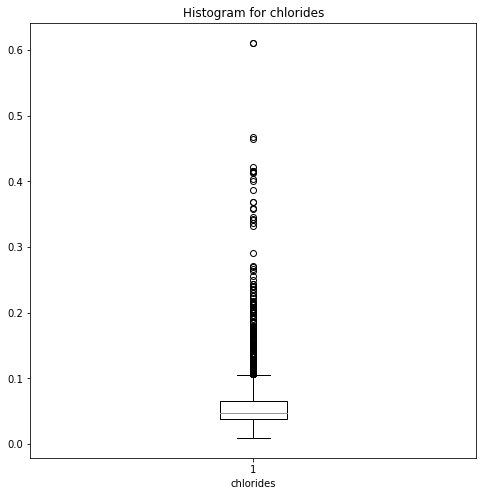

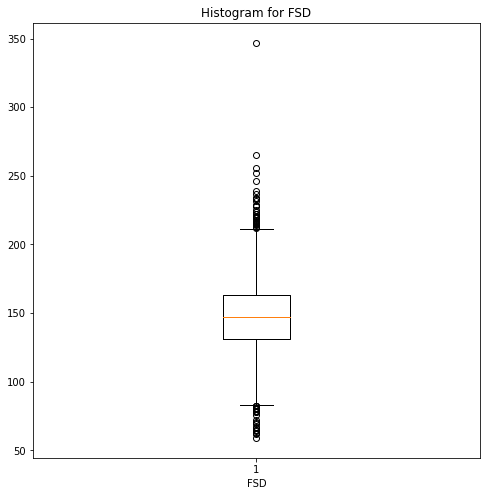

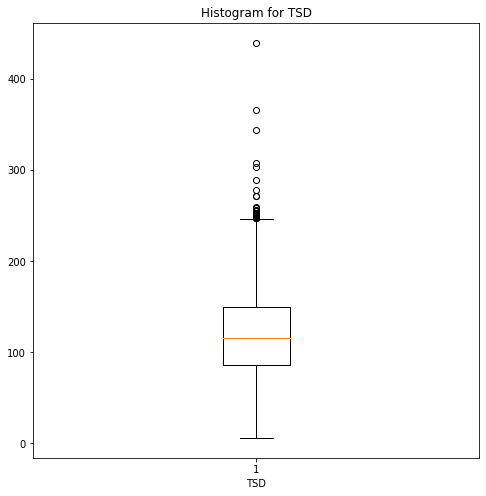

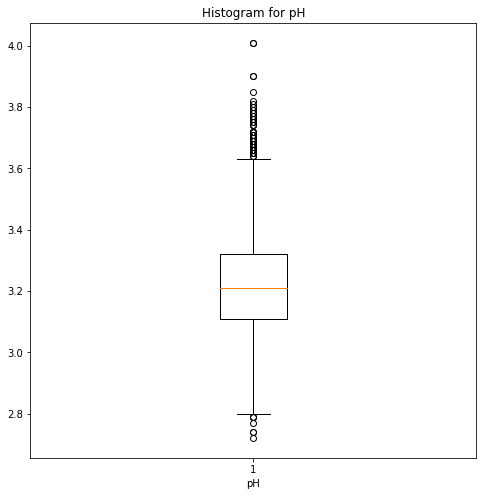

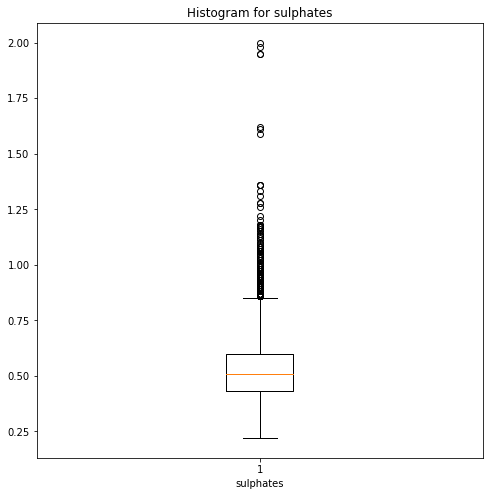

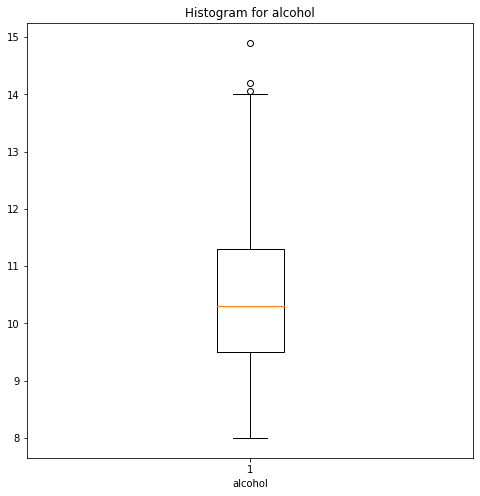

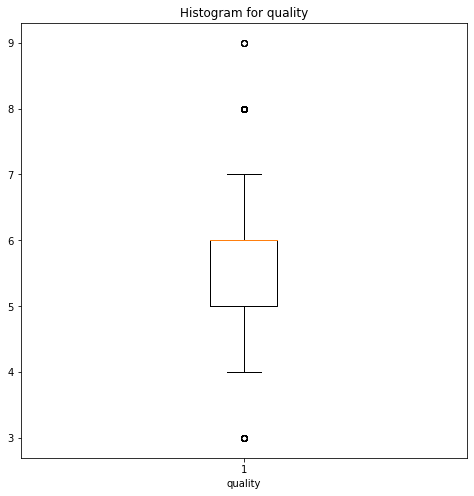

In [1597]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.figure(figsize = (8,8))
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.title("Histogram for " + str(i))
        plt.show()

In [1598]:
#we can see a large number of outliers. now remove them

print(len(df[df['FA'] > 14]))
print(len(df[df['VA'] > 8.0]))
print(len(df[df['CA'] > 5.5]))
print(len(df[df['RS'] > 30]))
print(len(df[df['chlorides'] > 0.40]))
print(len(df[df['FSD'] > 300]))
print(len(df[df['TSD'] > 200]))
print(len(df[df['pH'] > 3.8]))
print(len(df[df['sulphates'] > 1.50]))
print(len(df[df['alcohol'] > 14]))

df = df[df['FA'] < 14]
df = df[df['VA'] < 8.0]
df = df[df['CA'] < 5.5]
df = df[df['RS'] < 30]
df = df[df['chlorides'] < 0.40]
df = df[df['FSD'] < 300]
df = df[df['TSD'] < 200]
df = df[df['pH'] < 3.8]
df = df[df['pH'] > 2.8]
df = df[df['sulphates'] < 1.50]
df = df[df['alcohol'] < 14]

print("the number of instances after removal of the outlliers is ",len(df))

9
4
8
3
12
1
348
7
7
3
the number of instances after removal of the outlliers is  5865


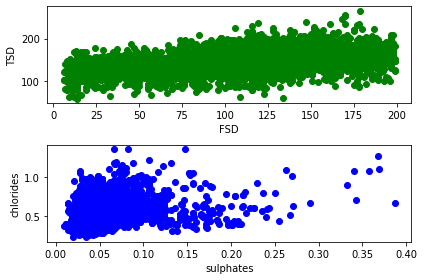

In [1599]:
#Further research data on relationships between the columns
fig, a = plt.subplots(2)
x = df['TSD']
y = df['FSD']
a[0].plot(x, y, 'o', color='green')
a[0].set_ylabel('TSD')
a[0].set_xlabel('FSD')

a[1].plot(df['chlorides'],df['sulphates'], 'o', color='blue')
a[1].set_ylabel('chlorides')
a[1].set_xlabel('sulphates')

plt.tight_layout()

Text(0, 0.5, 'FA')

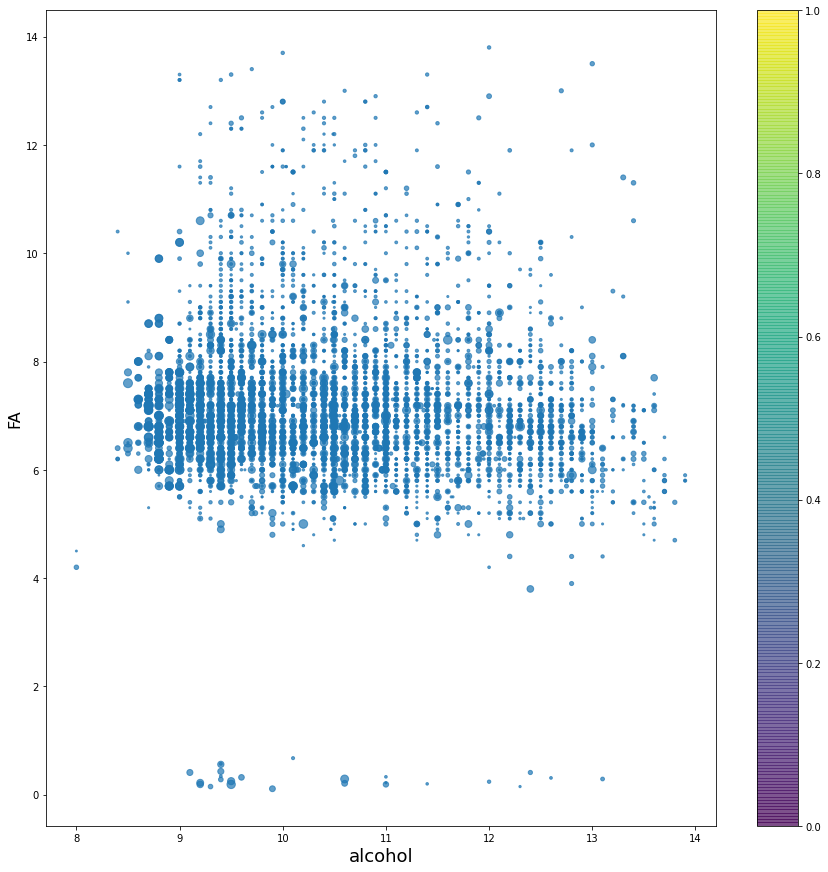

In [1600]:
df_copy = df.copy()
conv_dict={'low':1,'medium':2,'high':3,'very high':4}
df_copy['density_ord']=df_copy['density'].apply(conv_dict.get)
sorted_sectors=sorted(df_copy['density_ord'].unique())
sector_cat= pd.Categorical(df_copy['density_ord'], ordered=True, categories= sorted_sectors)
sector_cat.codes
plt.scatter(df_copy['alcohol'], df_copy['FA'], s= df_copy['RS']*4, alpha=0.7,
cmap='jet')
plt.colorbar()
plt.gcf().set_size_inches((15, 15))
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('FA', fontsize=16)

In [1601]:
df.pivot_table(index=['density', 'kind'],
aggfunc={'TSD':'mean', 'chlorides':'mean','alcohol':'mean','FA':'mean', 'VA':'mean', 'CA':'mean', 'RS':'mean', 'FSD':'mean'})

CA        FA         FSD         RS         TSD  \
density   kind                                                           
high      red    1.264473  7.665782  129.522856   2.290621   52.618584   
          white  1.831789  6.962982  149.490908   8.429048  143.383825   
low       red    1.296923  6.184615  152.269231   1.896154   78.369391   
          white  2.010546  6.585660  155.706574   2.641196  112.839749   
medium    red    1.350816  6.943573  135.010663   2.124104   42.559785   
          white  1.875285  6.876467  146.184591   4.362079  126.006829   
very high red    1.906861  9.205457  127.211015   2.968260   58.583034   
          white  2.067358  7.065353  155.286211  13.959277  151.808613   

                       VA    alcohol  chlorides  
density   kind                                   
high      red    0.575140  10.404306   0.083022  
          white  0.339164   9.835330   0.049779  
low       red    0.380000  12.766667   0.046923  
          white  0.306069  11.750693   0.036996  
medium    red    0.552527  11.639431   0.070617  
          white  0.289737  10.373527   0.049143  
very high red    0.522153  10.023025   0.090769  
          white  0.301623   9.281584   0.051036

In [1602]:
#Turn this problem into a classification problem. if the quality is less than 5 we classify it as poor else as high quality
def classify(i):

  if i<=5:
    return 0
  else:
    return 1
  
df['quality'] = df['quality'].apply(classify)


Text(0, 0.5, 'Counts')

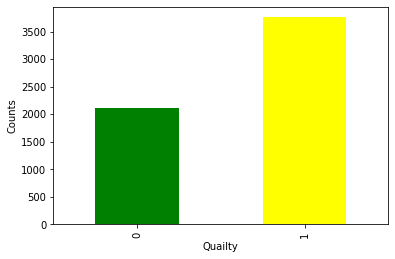

In [1603]:
df['quality'].value_counts().plot(kind = 'bar',color = ['Yellow','green'])
plt.xlabel('Quailty')
plt.ylabel('Counts')

We can see that there are 3750 high quality wine as compared to 1800 low quality wine

In [1604]:
#Checking the important features with the help of a correlation matrix
df_oh= pd.concat([df,pd.get_dummies(df['density'])],axis=1)
df_oh= pd.concat([df_oh,pd.get_dummies(df['kind'])],axis=1)
corr_oh = df_oh.corr()
corr_oh


,FA,VA,CA,RS,chlorides,FSD,TSD,pH,sulphates,alcohol,quality,high,low,medium,very high,red,white
FA,1.000000,-0.235644,0.259100,-0.121842,0.318792,-0.229392,-0.320969,-0.213252,0.290203,-0.094625,-0.062965,0.041764,-0.271115,-0.133159,0.377182,0.465210,-0.465210
VA,-0.235644,1.000000,-0.167317,-0.057765,0.141951,-0.139895,-0.149230,0.109960,0.059575,-0.023071,-0.105505,0.098261,-0.081709,-0.060212,0.048182,0.233748,-0.233748
CA,0.259100,-0.167317,1.000000,0.087391,-0.071685,0.350487,0.165348,-0.274567,0.060450,0.149967,0.325197,-0.183229,0.112121,-0.025834,0.094565,-0.201989,0.201989
RS,-0.121842,-0.057765,0.087391,1.000000,-0.137453,0.229317,0.425759,-0.265373,-0.197020,-0.334723,-0.020095,0.058108,-0.334502,-0.140405,0.434084,-0.336936,0.336936
chlorides,0.318792,0.141951,-0.071685,-0.137453,1.000000,-0.290081,-0.309868,0.104672,0.330730,-0.288974,-0.195744,0.180102,-0.366699,-0.070612,0.272708,0.573684,-0.573684
FSD,-0.229392,-0.139895,0.350487,0.229317,-0.290081,1.000000,0.429562,-0.089426,-0.084691,0.207360,0.593122,-0.125752,0.236153,-0.026680,-0.091299,-0.392098,0.392098
TSD,-0.320969,-0.149230,0.165348,0.425759,-0.309868,0.429562,1.000000,-0.243146,-0.286312,-0.191846,-0.012835,-0.090194,0.037942,0.076692,-0.027834,-0.687193,0.687193
pH,-0.213252,0.109960,-0.274567,-0.265373,0.104672,-0.089426,-0.243146,1.000000,0.242536,0.090107,0.002468,0.108971,-0.083889,0.007670,-0.030415,0.347311,-0.347311
sulphates,0.290203,0.059575,0.060450,-0.197020,0.330730,-0.084691,-0.286312,0.242536,1.000000,0.002503,0.057091,0.081933,-0.180421,-0.102380,0.210730,0.493155,-0.493155
alcohol,-0.094625,-0.023071,0.149967,-0.334723,-0.288974,0.207360,-0.191846,0.090107,0.002503,1.000000,0.397222,-0.213711,0.624465,-0.005089,-0.428590,-0.064638,0.064638


<AxesSubplot:>

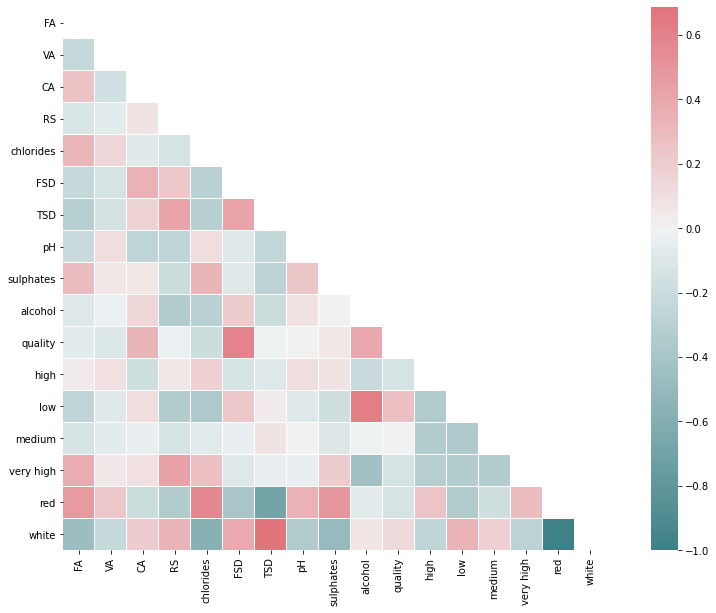

In [1605]:
mask = np.triu(np.ones_like(corr_oh, dtype=bool))
f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_oh, mask=mask, cmap=cmap, center=0,
square=True, linewidths=.5)

In [1606]:
#checking the important features with the help of a correlation matrix
df_oh= pd.concat([df,pd.get_dummies(df['density'])],axis=1)
df_oh= pd.concat([df_oh,pd.get_dummies(df['kind'])],axis=1)

In [1607]:
#Remove kind from the features

df.drop('kind',axis = 1,inplace=True)

In [1608]:
#appply label encoding to density feature
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['density'] = le.fit_transform(df['density'])

Now - normalise the features to a standard scale

In [1609]:
from sklearn import preprocessing
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
standardise_x = preprocessing.scale(X)

In [1610]:
df.head()

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,7.0,0.27,2.16,20.7,0.045,167.0,170.0,3,3.00,0.45,8.8,1
1,6.3,0.30,2.04,1.6,0.049,136.0,132.0,2,3.30,0.49,9.5,1
2,8.1,0.28,2.40,6.9,0.050,148.0,97.0,0,3.26,0.44,10.1,1
3,7.2,0.23,1.92,8.5,0.058,165.0,186.0,0,3.19,0.40,9.9,1
4,7.2,0.23,1.92,8.5,0.058,169.0,186.0,0,3.19,0.40,9.9,1


**train our model using Gaussian Naive Bayes**

In [1611]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(standardise_x,np.array(Y),random_state = 42)


In [1612]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB().fit(X_train,Y_train)

y = clf.predict(X_test)

accuracy = accuracy_score(y,Y_test)

print("accuracy acheived with Naive Bayes by using all features is",accuracy*100)

accuracy acheived with Naive Bayes by using all features is 81.73142467620995


accuracy acheived with Naive Bayes by using all features is 81.73142467620995

In [1613]:
print("The classification report using 2 important features is",classification_report(Y_test,y)) 

The classification report using 2 important features is               precision    recall  f1-score   support

           0       0.74      0.75      0.74       524
           1       0.86      0.86      0.86       943

    accuracy                           0.82      1467
   macro avg       0.80      0.80      0.80      1467
weighted avg       0.82      0.82      0.82      1467



**Extracting only 2 important features for our model using Permutation Importance**

In [1614]:
from sklearn.inspection import permutation_importance
importance = permutation_importance(clf, X_test, Y_test)
a = importance.importances_mean
b = a[:]
print(a)

[-9.54328562e-04  1.36332652e-03  1.93592365e-02 -1.63599182e-03
  4.36264485e-03  1.52419905e-01 -1.63599182e-03 -2.04498978e-03
  1.36332652e-04  4.08997955e-03  3.69461486e-02]


The 2 important features are CA and Alcohol

Text(0.5, 1.0, 'Scatter plot for citric acid vs Alcohol')

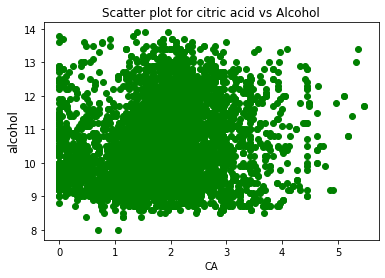

In [1615]:
plt.scatter(df['CA'],df['alcohol'],color = ['green'])
plt.xlabel('CA',fontsize = 10)
plt.ylabel('alcohol',fontsize = 12)
plt.title('Scatter plot for citric acid vs Alcohol')

In [1616]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


df1 = pd.DataFrame(df,columns= ['CA','alcohol','quality'])


X = df1.iloc[:,:-1]

Y = df1.iloc[:,-1]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42)


clf = GaussianNB().fit(X_train,Y_train)

y = clf.predict(X_test)

accuracy = accuracy_score(y,Y_test)

print("accuracy acheived with Naive Bayes by using alcohol and Citiric Acid  is",accuracy*100)

print("The classification report using 2 important features is",classification_report(Y_test,y)) 


accuracy acheived with Naive Bayes by using alcohol and Citiric Acid  is 71.64280845262441
The classification report using 2 important features is               precision    recall  f1-score   support

           0       0.60      0.65      0.62       524
           1       0.79      0.76      0.77       943

    accuracy                           0.72      1467
   macro avg       0.69      0.70      0.70      1467
weighted avg       0.72      0.72      0.72      1467



In this case all the features combined together gives better results than the 2 important features

**Decision Tree Classifier Baseline Model**

In [1617]:
df_random.dropna(inplace=True)

Label Encode the Categorical Variables

In [1618]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_random['density'] = le.fit_transform(df_random['density'])
df_random['kind'] = le.fit_transform(df_random['kind'])

In [1619]:
df_random.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
0,7.0,0.27,2.16,20.7,0.045,167.0,170.0,3,3.00,0.45,8.8,6,1
1,6.3,0.30,2.04,1.6,0.049,136.0,132.0,2,3.30,0.49,9.5,6,1
2,8.1,0.28,2.40,6.9,0.050,148.0,97.0,0,3.26,0.44,10.1,6,1
3,7.2,0.23,1.92,8.5,0.058,165.0,186.0,0,3.19,0.40,9.9,6,1
4,7.2,0.23,1.92,8.5,0.058,169.0,186.0,0,3.19,0.40,9.9,6,1


In [1620]:
df_random = df_random[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol','kind','quality']]

In [1621]:
df_random['quality'] = df_random['quality'].apply(classify)

In [1622]:
df_random.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,kind,quality
0,7.0,0.27,2.16,20.7,0.045,167.0,170.0,3.00,0.45,8.8,1,1
1,6.3,0.30,2.04,1.6,0.049,136.0,132.0,3.30,0.49,9.5,1,1
2,8.1,0.28,2.40,6.9,0.050,148.0,97.0,3.26,0.44,10.1,1,1
3,7.2,0.23,1.92,8.5,0.058,165.0,186.0,3.19,0.40,9.9,1,1
4,7.2,0.23,1.92,8.5,0.058,169.0,186.0,3.19,0.40,9.9,1,1


In [1623]:
from sklearn.model_selection import train_test_split

X_train_base,X_test_base,Y_train_base,Y_test_base = train_test_split(df_random.iloc[:,:-1],df_random.iloc[:,-1],random_state = 42)

In [1624]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_base,Y_train_base)

y_pred = clf.predict(X_test_base)

accuracy_1 =  accuracy_score(y_pred,Y_test_base)

print("accuracy obtained using Decision Tree baseline model is",accuracy_1 * 100)


accuracy obtained using Decision Tree baseline model is 87.31769181991123


In [1625]:
print("The classification report of Baseline Decision Tree Algorithm is")
print(classification_report(Y_test_base,y_pred))

The classification report of Baseline Decision Tree Algorithm is
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       570
           1       0.90      0.90      0.90      1007

    accuracy                           0.87      1577
   macro avg       0.86      0.86      0.86      1577
weighted avg       0.87      0.87      0.87      1577



I achieved an Accuracy of around 87 percent with Decision Tree Algorithm baseline model. 

**Decision Tree Model with the modified data set**

In [1626]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
standardise_x = preprocessing.scale(X)
X_train,X_test,Y_train,Y_test = train_test_split(standardise_x,Y,random_state = 42)
clf.fit(X_train,Y_train)
predicted_values = clf.predict(X_test)
accuracy_1 =  accuracy_score(predicted_values,Y_test)

print("accuracy obtained using Decision Tree Algorithm using modified data set  is",accuracy_1 * 100)

accuracy obtained using Decision Tree Algorithm using modified data set  is 86.09406952965234


In [1627]:
print("The classification report of Decision tree Algorithm using modified data set  is")
print(classification_report(Y_test,predicted_values))

The classification report of Decision tree Algorithm using modified data set  is
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       524
           1       0.89      0.89      0.89       943

    accuracy                           0.86      1467
   macro avg       0.85      0.85      0.85      1467
weighted avg       0.86      0.86      0.86      1467



Feature: 0, Score: 0.03245
Feature: 1, Score: 0.04764
Feature: 2, Score: 0.05956
Feature: 3, Score: 0.02868
Feature: 4, Score: 0.03266
Feature: 5, Score: 0.46653
Feature: 6, Score: 0.13253
Feature: 7, Score: 0.00509
Feature: 8, Score: 0.04137
Feature: 9, Score: 0.02619
Feature: 10, Score: 0.12730


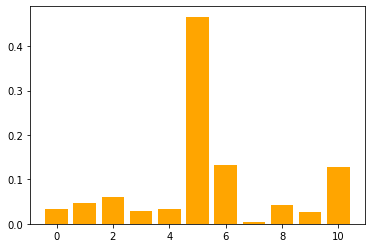

In [1628]:
#plot the feature importance graph 

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance,color = ['orange'])
plt.show()